**Xgboost**

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
print("Shape:", df.shape)
df.head()

Shape: (145879, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

Shape of X: (145879, 58)
Shape of y: (145879,)
First 5 rows of X:
   id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   7          2              2          5              1              0   
1   9          1              1          7              0              0   
2  13          5              4          9              1              0   
3  16          0              1          2              0              0   
4  17          0              2          0              1              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_ca

## Apply RandomUndersampling




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler with random_state for reproducibility
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

print("Shape of X_resampled with RandomUnderSampler:", X_resampled_rus.shape)
print("Shape of y_resampled with RandomUnderSampler:", y_resampled_rus.shape)
print("\nValue counts of y_resampled with RandomUnderSampler after undersampling:")
print(y_resampled_rus.value_counts())

Shape of X_resampled with RandomUnderSampler: (10712, 58)
Shape of y_resampled with RandomUnderSampler: (10712,)

Value counts of y_resampled with RandomUnderSampler after undersampling:
target
0    5356
1    5356
Name: count, dtype: int64


In [ ]:
# Drop the 'id' column from X_resampled_rus
X_resampled_rus = X_resampled_rus.drop('id', axis=1)

print("Shape of X_resampled_rus after dropping 'id' column:", X_resampled_rus.shape)

Shape of X_resampled_rus after dropping 'id' column: (10712, 57)


In [ ]:
columns_to_drop_calc = [col for col in X_resampled_rus.columns if 'calc' in col]
X_resampled_rus = X_resampled_rus.drop(columns=columns_to_drop_calc)
X_resampled_rus = X_resampled_rus.drop(columns='ps_car_03_cat')
X_resampled_rus = X_resampled_rus.drop(columns='ps_car_05_cat')
print("Shape of X_resampled_rus after dropping 'calc' features:", X_resampled_rus.shape)
print("Dropped 'calc' features:", columns_to_drop_calc)

Shape of X_resampled_rus after dropping 'calc' features: (10712, 35)
Dropped 'calc' features: ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [ ]:
missing_counts = (X_resampled_rus == -1).sum()

# Sort features by their missing counts in descending order
missing_counts = missing_counts.sort_values(ascending=False)

# Identify the top 2 features with the highest missing data count
top_2_missing_features = missing_counts.head(2).index.tolist()

# Drop these top 2 features from X_resampled_rus
X_resampled_rus = X_resampled_rus.drop(columns=top_2_missing_features)

print(f"Dropped the following features due to high missing values: {top_2_missing_features}")
print(f"New shape of X_resampled_rus: {X_resampled_rus.shape}")

Dropped the following features due to high missing values: ['ps_reg_03', 'ps_car_14']
New shape of X_resampled_rus: (10712, 33)


In [ ]:
data = []
# Using X_resampled_rus as the DataFrame for metadata extraction
for f in X_resampled_rus.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id': # 'id' should no longer be present here, but for robustness
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    # Check if 'bin' is in feature name for binary
    if 'bin' in f:
        level = 'binary'
    # Check if 'cat' is in feature name for nominal
    elif 'cat' in f:
        level = 'nominal'
    # Check dtype for interval/ordinal
    elif X_resampled_rus[f].dtype == float:
        level = 'interval'
    elif X_resampled_rus[f].dtype == int:
        level = 'ordinal'
    else:
        level = 'other' # Catch any other types

    # Initialize keep to True for all variables except for id (which is now dropped)
    keep = True
    if f == 'id': # This condition will likely not be met now
        keep = False

    # Defining the data type
    dtype = X_resampled_rus[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
print(meta)

                role     level  keep    dtype
varname                                      
ps_ind_01      input   ordinal  True    int64
ps_ind_02_cat  input   nominal  True    int64
ps_ind_03      input   ordinal  True    int64
ps_ind_04_cat  input   nominal  True    int64
ps_ind_05_cat  input   nominal  True    int64
ps_ind_06_bin  input    binary  True    int64
ps_ind_07_bin  input    binary  True    int64
ps_ind_08_bin  input    binary  True    int64
ps_ind_09_bin  input    binary  True    int64
ps_ind_10_bin  input    binary  True    int64
ps_ind_11_bin  input    binary  True    int64
ps_ind_12_bin  input    binary  True    int64
ps_ind_13_bin  input    binary  True    int64
ps_ind_14      input   ordinal  True    int64
ps_ind_15      input   ordinal  True    int64
ps_ind_16_bin  input    binary  True    int64
ps_ind_17_bin  input    binary  True    int64
ps_ind_18_bin  input    binary  True    int64
ps_reg_01      input  interval  True  float64
ps_reg_02      input  interval  Tr

In [ ]:
import numpy as np

# Identify 'interval' and 'ordinal' features from the meta DataFrame
interval_and_ordinal_features = meta[(meta.level == 'interval') | (meta.level == 'ordinal')].index.tolist()

# Impute missing values (-1) with the median for identified features
for col in interval_and_ordinal_features:
    # Calculate median only from non-missing values
    median_val = X_resampled_rus.loc[X_resampled_rus[col] != -1, col].median()
    # Replace -1 with the calculated median
    X_resampled_rus[col] = X_resampled_rus[col].replace(-1, median_val)

print("Missing values (-1) in 'interval' and 'ordinal' features have been imputed with their respective medians.")
print("First 5 rows of X_resampled_rus after imputation:")
print(X_resampled_rus.head())

Missing values (-1) in 'interval' and 'ordinal' features have been imputed with their respective medians.
First 5 rows of X_resampled_rus after imputation:
        ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
63118           0              1          5              0              1   
141962          1              2          2              1              0   
3924            1              1          2              1              0   
143718          1              1          5              0              0   
124015          0              1          2              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
63118               1              0              0              0   
141962              1              0              0              0   
3924                0              1              0              0   
143718              1              0              0              0   
124015              1          

In [ ]:
nominal_features = meta[(meta.level == 'nominal') & (meta.keep == True)].index.tolist()

for col in nominal_features:
    if col in X_resampled_rus.columns:
        X_resampled_rus[col] = X_resampled_rus[col].astype('category')

print("Nominal features successfully converted to 'category' dtype.")
print("Updated dtypes for nominal features (first 5):")
print(X_resampled_rus[nominal_features].dtypes.head())

Nominal features successfully converted to 'category' dtype.
Updated dtypes for nominal features (first 5):
ps_ind_02_cat    category
ps_ind_04_cat    category
ps_ind_05_cat    category
ps_car_01_cat    category
ps_car_02_cat    category
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_rus, y_resampled_rus, test_size=0.2, random_state=42)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of X_test_resampled:", X_test_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)

Shape of X_train_resampled: (8569, 33)
Shape of X_test_resampled: (2143, 33)
Shape of y_train_resampled: (8569,)
Shape of y_test_resampled: (2143,)


In [ ]:

param_dist_xgb_extended = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0.0, 0.001, 0.01, 0.1],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

print("Extended Hyperparameter Distribution for XGBoost:")
print(param_dist_xgb_extended)

Extended Hyperparameter Distribution for XGBoost:
{'max_depth': [3, 5, 7], 'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [50, 100, 150], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0.0, 0.1, 0.2, 0.3], 'min_child_weight': [1, 5, 10], 'reg_alpha': [0.0, 0.001, 0.01, 0.1], 'reg_lambda': [0.0, 0.1, 0.5, 1.0]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Instantiate an XGBClassifier with specified parameters
xgb_clf_extended = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True  # Enable categorical feature handling
)

# Instantiate RandomizedSearchCV
random_search_extended = RandomizedSearchCV(
    estimator=xgb_clf_extended,
    param_distributions=param_dist_xgb_extended,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42, # For reproducibility
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search_extended.fit(X_train_resampled, y_train_resampled)

# Print the best_params_ and best_score_
print("Best hyperparameters found (extended search):", random_search_extended.best_params_)
print("Best ROC AUC score (extended search):", random_search_extended.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:49:59] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:49:59] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:00] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:00] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:01] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:01] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:02] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:02] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:03] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:03] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:04] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]



--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:04] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:05] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7df0bbabdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7df0bbcd45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7df0bbcd5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7df0bbcd6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7df0bbcce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7df0bbe50b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7df0bb9c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7df0dc150e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7df0dc14d493]



--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 673, in input_data
    dispatch_proxy_set_data(self.proxy, new)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1731, in dispatch_proxy_set_data
    proxy._ref_data_from_columnar(data)  # pylint: disable=W0212
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1619, in _ref_data_from_columnar
    _check_call(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 323, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:50:05] /workspace/src/data/columnar.h:134: Category index from DataFrame has floating point dtype, consider using strings or integers instead.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7db1e92bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d45b8) [0x7db1e94d45b8]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d5efd) [0x7db1e94d5efd]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d6028) [0x7db1e94d6028]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4ce044) [0x7db1e94ce044]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x650b65) [0x7db1e9650b65]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGProxyDMatrixSetDataColumnar+0x58) [0x7db1e91c6b68]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7db20993ee2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7db20993b493]




In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Initialize a new XGBClassifier instance using the random_search_extended.best_params_
tuned_xgb_model_extended = XGBClassifier(
    **random_search_extended.best_params_, # Unpack the best parameters
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True  # Enable categorical feature handling
)

# 2. Train this new XGBoost model on the X_train_resampled_cat and y_train_resampled_cat datasets
tuned_xgb_model_extended.fit(X_train_resampled, y_train_resampled)

# 3. Make binary predictions (y_pred_tuned_xgb_extended) on X_test_resampled_cat
y_pred_tuned_xgb_extended = tuned_xgb_model_extended.predict(X_test_resampled)

# 4. Obtain probability predictions for the positive class (y_pred_proba_tuned_xgb_extended)
y_pred_proba_tuned_xgb_extended = tuned_xgb_model_extended.predict_proba(X_test_resampled)[:, 1]

# 5. Calculate evaluation metrics
accuracy_tuned_xgb_extended = accuracy_score(y_test_resampled, y_pred_tuned_xgb_extended)
precision_tuned_xgb_extended = precision_score(y_test_resampled, y_pred_tuned_xgb_extended, average='binary')
recall_tuned_xgb_extended = recall_score(y_test_resampled, y_pred_tuned_xgb_extended, average='binary')
f1_tuned_xgb_extended = f1_score(y_test_resampled, y_pred_tuned_xgb_extended, average='binary')
auc_tuned_xgb_extended = roc_auc_score(y_test_resampled, y_pred_proba_tuned_xgb_extended)
gini_tuned_xgb_extended = 2 * auc_tuned_xgb_extended - 1

# 6. Print all calculated evaluation metrics
print("Extended Tuned XGBoost Model Performance:")
print(f"Accuracy: {accuracy_tuned_xgb_extended:.4f}")
print(f"Precision: {precision_tuned_xgb_extended:.4f}")
print(f"Recall: {recall_tuned_xgb_extended:.4f}")
print(f"F1-Score: {f1_tuned_xgb_extended:.4f}")
print(f"AUC: {auc_tuned_xgb_extended:.4f}")
print(f"Gini Coefficient: {gini_tuned_xgb_extended:.4f}")

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

**LGBoost Model**

In [ ]:
param_dist_lgbm_extended = {
    'num_leaves': [10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.01, 0.1, 0.5],
    'reg_lambda': [0.0, 0.01, 0.1, 0.5]
}

print("Extended Hyperparameter Distribution for LightGBM:")
print(param_dist_lgbm_extended)

Extended Hyperparameter Distribution for LightGBM:
{'num_leaves': [10, 20, 30, 40, 50], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 5, 7, 10], 'subsample': [0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.7, 0.8, 0.9, 1.0], 'reg_alpha': [0.0, 0.01, 0.1, 0.5], 'reg_lambda': [0.0, 0.01, 0.1, 0.5]}


In [ ]:
import warnings
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Suppress all warnings
warnings.filterwarnings('ignore')

# Ensure X_train_resampled and X_test_resampled are DataFrames and not Series
# Re-split the data to ensure updated dtypes are propagated to train/test sets if necessary
# Assuming X_train_resampled and X_test_resampled are already defined from previous steps

# Identify categorical features by checking their dtype in X_train_resampled
categorical_features_lgbm = X_train_resampled.select_dtypes(include='category').columns.tolist()

# 1. Perform random search for best hyperparameters for LightGBM
# Instantiate an LGBMClassifier for RandomizedSearchCV
lgbm_clf_search = LGBMClassifier(
    objective='binary', # For binary classification
    random_state=42,
    verbose=-1 # Suppress verbose output during search
)

# Instantiate RandomizedSearchCV
random_search_lgbm_extended = RandomizedSearchCV(
    estimator=lgbm_clf_search,
    param_distributions=param_dist_lgbm_extended,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=0, # Suppress verbose output for RandomizedSearchCV itself
    random_state=42, # For reproducibility
    n_jobs=-1 # Use all available cores
)

print("Starting LightGBM RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data, passing categorical_feature to the fit method
random_search_lgbm_extended.fit(X_train_resampled, y_train_resampled, categorical_feature=categorical_features_lgbm)

# Print the best_params_ and best_score_ from the search
print("Best hyperparameters found (extended LightGBM search):")
print(random_search_lgbm_extended.best_params_)
print("Best ROC AUC score (extended LightGBM search):")
print(f"{random_search_lgbm_extended.best_score_:.4f}")

# 2. Fit a LightGBM model to the best hyperparameters found and print evaluation parameters
# Initialize a new LGBMClassifier instance using the best_params_
tuned_lgbm_model_extended = LGBMClassifier(
    objective='binary', # For binary classification
    random_state=42,
    verbose=-1, # Suppress warnings and verbose output during training
    **random_search_lgbm_extended.best_params_ # Unpack the best parameters
)

print("\nTraining LightGBM model with best hyperparameters...")
# Train this new LightGBM model on the X_train_resampled and y_train_resampled datasets
tuned_lgbm_model_extended.fit(X_train_resampled, y_train_resampled, categorical_feature=categorical_features_lgbm)

# Make binary predictions (y_pred_lgbm_extended) on X_test_resampled
y_pred_lgbm_extended = tuned_lgbm_model_extended.predict(X_test_resampled)

# Obtain probability predictions for the positive class (y_pred_proba_lgbm_extended)
y_pred_proba_lgbm_extended = tuned_lgbm_model_extended.predict_proba(X_test_resampled)[:, 1]

# Calculate evaluation metrics
accuracy_lgbm_extended = accuracy_score(y_test_resampled, y_pred_lgbm_extended)
precision_lgbm_extended = precision_score(y_test_resampled, y_pred_lgbm_extended, average='binary')
recall_lgbm_extended = recall_score(y_test_resampled, y_pred_lgbm_extended, average='binary')
f1_lgbm_extended = f1_score(y_test_resampled, y_pred_lgbm_extended, average='binary')
auc_lgbm_extended = roc_auc_score(y_test_resampled, y_pred_proba_lgbm_extended)
gini_lgbm_extended = 2 * auc_lgbm_extended - 1

# Print all calculated evaluation metrics
print("\nExtended Tuned LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgbm_extended:.4f}")
print(f"Precision: {precision_lgbm_extended:.4f}")
print(f"Recall: {recall_lgbm_extended:.4f}")
print(f"F1-Score: {f1_lgbm_extended:.4f}")
print(f"AUC: {auc_lgbm_extended:.4f}")
print(f"Gini Coefficient: {gini_lgbm_extended:.4f}")


Starting LightGBM RandomizedSearchCV...
Best hyperparameters found (extended LightGBM search):
{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 30, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best ROC AUC score (extended LightGBM search):
0.6260

Training LightGBM model with best hyperparameters...

Extended Tuned LightGBM Model Performance:
Accuracy: 0.5968
Precision: 0.5949
Recall: 0.5775
F1-Score: 0.5861
AUC: 0.6394
Gini Coefficient: 0.2787


**Feature Importance XGBoost**


Top 10 Feature Importances from Tuned XGBoost Model:
          Feature  Importance
16  ps_ind_17_bin    0.102542
5   ps_ind_06_bin    0.090660
4   ps_ind_05_cat    0.078079
31      ps_car_13    0.061108
6   ps_ind_07_bin    0.053341
28  ps_car_11_cat    0.051992
19      ps_reg_02    0.048877
26  ps_car_09_cat    0.044077
15  ps_ind_16_bin    0.040929
24  ps_car_07_cat    0.040204


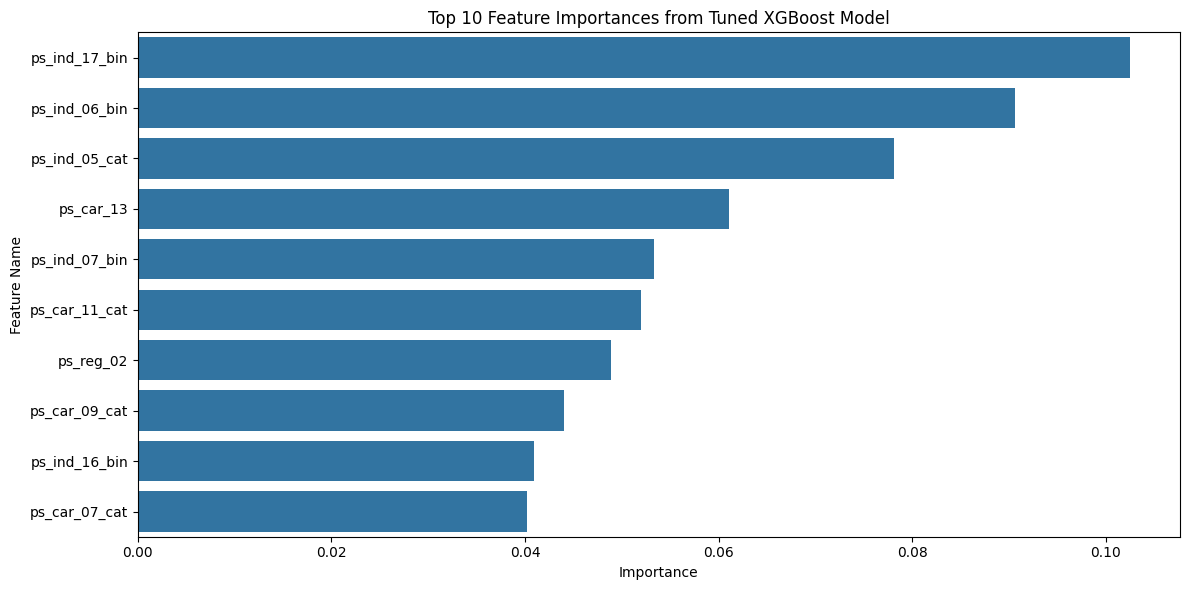

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# XGBoost Feature Importances
feature_importances_xgb = tuned_xgb_model_extended.feature_importances_
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances from Tuned XGBoost Model:")
print(feature_importance_df_xgb.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb.head(10))
plt.title('Top 10 Feature Importances from Tuned XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

**Feature Importance LightGBM**


Top 10 Feature Importances from Tuned LightGBM Model:
          Feature  Importance
28  ps_car_11_cat         720
31      ps_car_13         255
2       ps_ind_03         229
20  ps_car_01_cat         172
18      ps_reg_01         164
14      ps_ind_15         155
19      ps_reg_02         146
0       ps_ind_01         127
23  ps_car_06_cat         113
4   ps_ind_05_cat          92


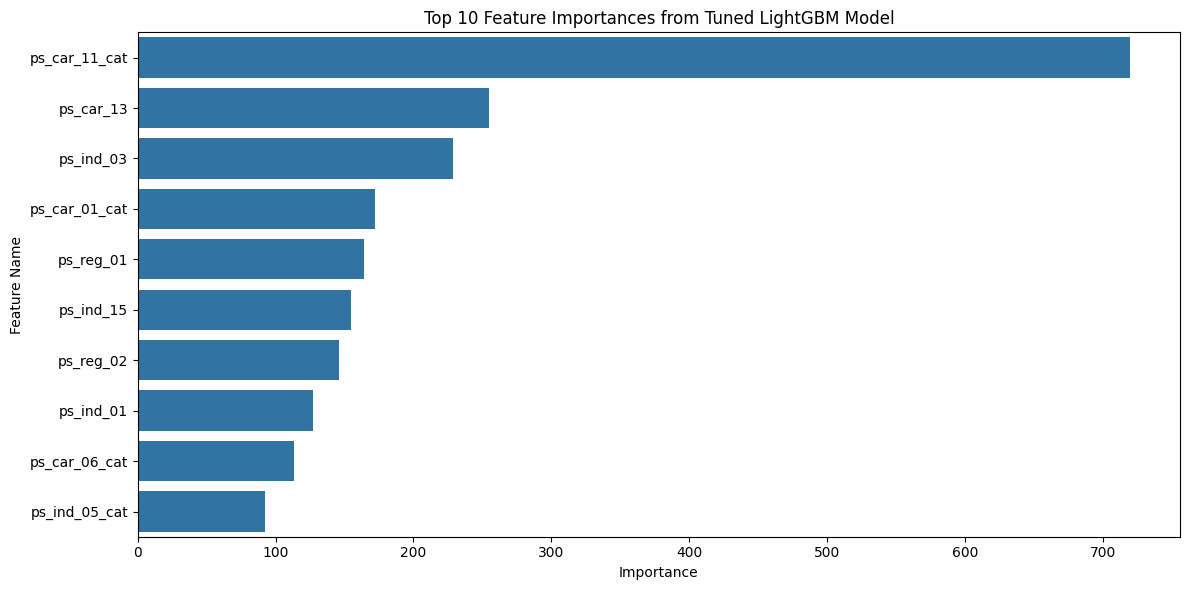

In [ ]:
# LightGBM Feature Importances
feature_importances_lgbm = tuned_lgbm_model_extended.feature_importances_
feature_importance_df_lgbm = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances_lgbm
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances from Tuned LightGBM Model:")
print(feature_importance_df_lgbm.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_lgbm.head(10))
plt.title('Top 10 Feature Importances from Tuned LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

**Parsimonious Approach- XG Boost**

In [ ]:
# --- 2. Parsimonious approach: Top 20 features for each model individually ---
print("\n--- Parsimonious Model Analysis (Top 20 Features) ---")

# Get top 20 features for XGBoost
top_20_xgb_features = feature_importance_df_xgb.head(20)['Feature'].tolist()
X_train_xgb_top20 = X_train_resampled[top_20_xgb_features]
X_test_xgb_top20 = X_test_resampled[top_20_xgb_features]

# Retrain XGBoost model with top 20 features
# Get parameters and remove 'random_state', 'eval_metric', and 'enable_categorical' to avoid duplication
params_xgb = tuned_xgb_model_extended.get_params()
params_xgb.pop('random_state', None) # Remove if present
params_xgb.pop('eval_metric', None) # Remove if present
params_xgb.pop('enable_categorical', None) # Remove if present

parsimonious_xgb_model = XGBClassifier(
    **params_xgb, # Unpack the modified parameters
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True,
    verbose=0 # Suppress verbose output
)

parsimonious_xgb_model.fit(X_train_xgb_top20, y_train_resampled)
y_pred_proba_parsimonious_xgb = parsimonious_xgb_model.predict_proba(X_test_xgb_top20)[:, 1]
gini_parsimonious_xgb = 2 * roc_auc_score(y_test_resampled, y_pred_proba_parsimonious_xgb) - 1
print(f"\nXGBoost Parsimonious Model (Top 20 Features) Gini Coefficient: {gini_parsimonious_xgb:.4f}")


--- Parsimonious Model Analysis (Top 20 Features) ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:13:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Parsimonious Model (Top 20 Features) Gini Coefficient: 0.2850


In [ ]:
import shap

# Create a SHAP TreeExplainer for the parsimonious XGBoost model
explainer_xgb = shap.TreeExplainer(parsimonious_xgb_model)

# Select an instance from the test set (X_test_xgb_top20) to explain
# For demonstration, we'll pick the first instance
instance_to_explain = X_test_xgb_top20.iloc[0]

# Calculate SHAP values for the selected instance, ensuring input is a DataFrame with a single row
shap_values_instance = explainer_xgb.shap_values(instance_to_explain.to_frame().T)

# Visualize the instance explanation using shap.plots.force
# This plot shows how each feature contributes to the prediction for a single instance
print("\nSHAP Force Plot for a Single Instance (Parsimonious XGBoost Model):")
shap.initjs() # Initialize JavaScript for interactive plots
shap.force_plot(explainer_xgb.expected_value, shap_values_instance, instance_to_explain)


SHAP Force Plot for a Single Instance (Parsimonious XGBoost Model):


In [ ]:
# Get top 20 features for LightGBM
top_20_lgbm_features = feature_importance_df_lgbm.head(20)['Feature'].tolist()
X_train_lgbm_top20 = X_train_resampled[top_20_lgbm_features]
X_test_lgbm_top20 = X_test_resampled[top_20_lgbm_features]

# Retrain LightGBM model with top 20 features
categorical_features_lgbm_top20 = X_train_lgbm_top20.select_dtypes(include='category').columns.tolist()

# Get parameters and remove 'random_state', 'objective', 'verbose' to avoid duplication/conflict
params_lgbm = tuned_lgbm_model_extended.get_params()
params_lgbm.pop('random_state', None) # Remove if present
params_lgbm.pop('objective', None)
params_lgbm.pop('verbose', None)

parsimonious_lgbm_model = LGBMClassifier(
    **params_lgbm, # Unpack the modified parameters
    objective='binary',
    random_state=42,
    verbose=-1 # Suppress verbose output
)

parsimonious_lgbm_model.fit(X_train_lgbm_top20, y_train_resampled, categorical_feature=categorical_features_lgbm_top20)
y_pred_proba_parsimonious_lgbm = parsimonious_lgbm_model.predict_proba(X_test_lgbm_top20)[:, 1]
gini_parsimonious_lgbm = 2 * roc_auc_score(y_test_resampled, y_pred_proba_parsimonious_lgbm) - 1
print(f"LightGBM Parsimonious Model (Top 20 Features) Gini Coefficient: {gini_parsimonious_lgbm:.4f}")

LightGBM Parsimonious Model (Top 20 Features) Gini Coefficient: 0.2777


# **Ensemble Model - XGBoost + \LGBoost**

In [ ]:
# --- 3. Ensemble model with original tuned models ---
print("\n--- Ensemble Model Analysis ---")

# Get probability predictions from the original tuned models on the full test set
# Ensure X_test_resampled has the correct categorical dtypes if needed by the models
# (Assuming models were fit with X_train_resampled which had categorical dtypes set)

# For XGBoost, ensure categorical features are correctly handled if not already done during model definition
xgb_probs_ensemble = tuned_xgb_model_extended.predict_proba(X_test_resampled)[:, 1]

# For LightGBM, ensure categorical features are correctly handled if not already done during model definition
lgbm_probs_ensemble = tuned_lgbm_model_extended.predict_proba(X_test_resampled)[:, 1]

# Combine probabilities using simple averaging
ensemble_probs = (xgb_probs_ensemble + lgbm_probs_ensemble) / 2

# Convert ensemble_probs into binary predictions using a threshold (e.g., 0.5)
ensemble_predictions = (ensemble_probs >= 0.5).astype(int)

# Calculate evaluation metrics for the ensemble
accuracy_ensemble = accuracy_score(y_test_resampled, ensemble_predictions)
precision_ensemble = precision_score(y_test_resampled, ensemble_predictions, average='binary')
recall_ensemble = recall_score(y_test_resampled, ensemble_predictions, average='binary')
f1_ensemble = f1_score(y_test_resampled, ensemble_predictions, average='binary')
auc_ensemble = roc_auc_score(y_test_resampled, ensemble_probs)
gini_ensemble = 2 * auc_ensemble - 1

# Print all calculated evaluation metrics for the ensemble
print("\nEnsemble Model Performance (Averaging Probabilities from Original Tuned Models):")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1-Score: {f1_ensemble:.4f}")
print(f"AUC: {auc_ensemble:.4f}")
print(f"Gini Coefficient: {gini_ensemble:.4f}")


--- Ensemble Model Analysis ---

Ensemble Model Performance (Averaging Probabilities from Original Tuned Models):
Accuracy: 0.6003
Precision: 0.5984
Recall: 0.5815
F1-Score: 0.5898
AUC: 0.6411
Gini Coefficient: 0.2822


**Parsimonious XGBoost Model Analysis**


--- Probability Density Graphs ---


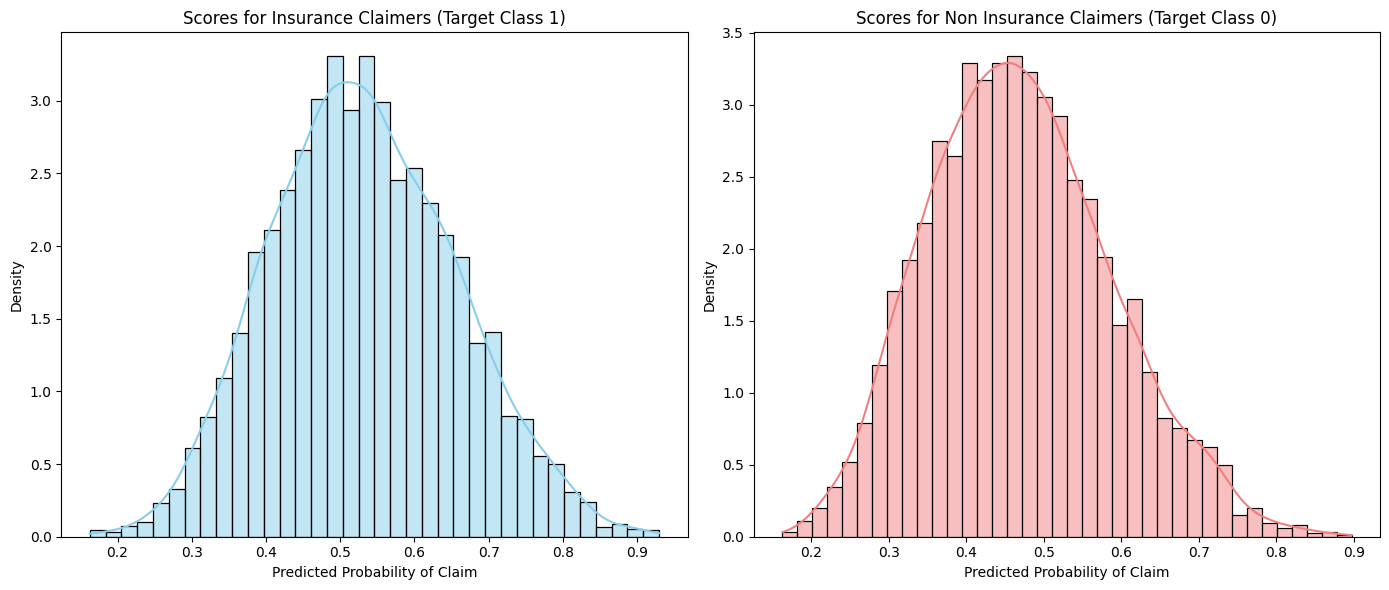


--- Cumulative Gain and Lift Charts ---


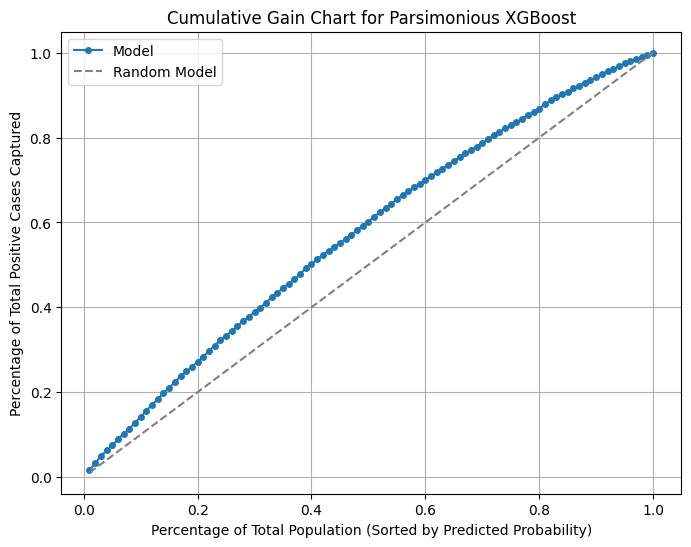

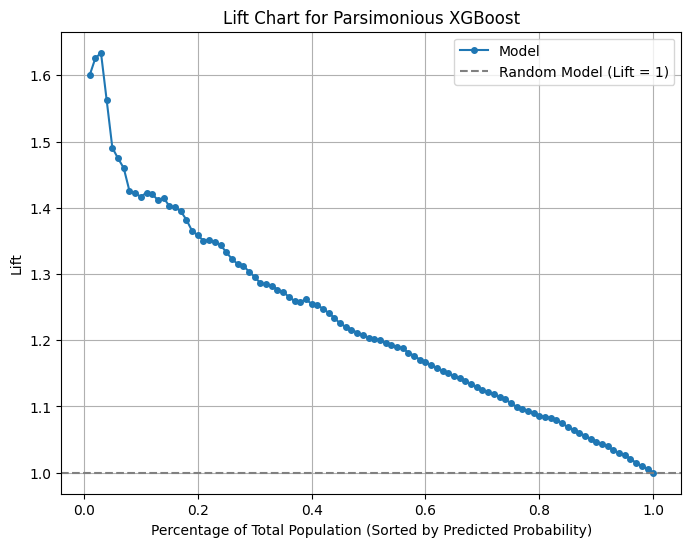

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming y_pred_proba_parsimonious_xgb and y_test_resampled are already defined
# from the previous execution of the parsimonious XGBoost model.

# --- 1) Probability Density Graphs ---
print("\n--- Probability Density Graphs ---")

# Separate predicted scores for target class 0 and 1
scores_class_0 = y_pred_proba_parsimonious_xgb[y_test_resampled == 0]
scores_class_1 = y_pred_proba_parsimonious_xgb[y_test_resampled == 1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(scores_class_1, kde=True, color='skyblue', stat='density')
plt.title('Scores for Insurance Claimers (Target Class 1)')
plt.xlabel('Predicted Probability of Claim')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(scores_class_0, kde=True, color='lightcoral', stat='density')
plt.title('Scores for Non Insurance Claimers (Target Class 0)')
plt.xlabel('Predicted Probability of Claim')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# --- 2) Plot Cumulative Gain Chart and Lift Chart for Parsimonious XGBoost Model ---
print("\n--- Cumulative Gain and Lift Charts ---")

def plot_cumulative_gain_chart(y_true, y_probas, title='Cumulative Gain Chart'):
    df = pd.DataFrame({'true': y_true, 'proba': y_probas})
    df = df.sort_values(by='proba', ascending=False).reset_index(drop=True)

    n_samples = len(df)
    n_pos_cases = df['true'].sum()

    gains = []
    x_axis = np.arange(0.01, 1.01, 0.01) # Percentiles from 1% to 100%

    for i in x_axis:
        num_samples_to_take = int(n_samples * i)
        if num_samples_to_take == 0: # Avoid division by zero or empty slice
            gains.append(0)
            continue
        subset = df.head(num_samples_to_take)
        positive_cases_in_subset = subset['true'].sum()
        gain = positive_cases_in_subset / n_pos_cases
        gains.append(gain)

    plt.figure(figsize=(8, 6))
    plt.plot(x_axis, gains, marker='o', linestyle='-', markersize=4, label='Model')
    plt.plot(x_axis, x_axis, linestyle='--', color='gray', label='Random Model') # Baseline
    plt.title(title)
    plt.xlabel('Percentage of Total Population (Sorted by Predicted Probability)')
    plt.ylabel('Percentage of Total Positive Cases Captured')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_lift_chart(y_true, y_probas, title='Lift Chart'):
    df = pd.DataFrame({'true': y_true, 'proba': y_probas})
    df = df.sort_values(by='proba', ascending=False).reset_index(drop=True)

    n_samples = len(df)
    n_pos_cases = df['true'].sum()
    overall_positive_rate = n_pos_cases / n_samples

    lifts = []
    x_axis = np.arange(0.01, 1.01, 0.01) # Percentiles from 1% to 100%

    for i in x_axis:
        num_samples_to_take = int(n_samples * i)
        if num_samples_to_take == 0: # Avoid division by zero or empty slice
            lifts.append(1) # Lift is 1 for 0 selected population
            continue
        subset = df.head(num_samples_to_take)
        positive_cases_in_subset = subset['true'].sum()

        # Calculate response rate in the selected subset
        response_rate_in_subset = positive_cases_in_subset / num_samples_to_take

        if overall_positive_rate == 0: # Handle case where there are no positive cases overall
            lift = 0 # Or handle as an error if it shouldn't happen
        else:
            lift = response_rate_in_subset / overall_positive_rate
        lifts.append(lift)

    plt.figure(figsize=(8, 6))
    plt.plot(x_axis, lifts, marker='o', linestyle='-', markersize=4, label='Model')
    plt.axhline(y=1, color='gray', linestyle='--', label='Random Model (Lift = 1)') # Baseline
    plt.title(title)
    plt.xlabel('Percentage of Total Population (Sorted by Predicted Probability)')
    plt.ylabel('Lift')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting for the parsimonious XGBoost model
plot_cumulative_gain_chart(y_test_resampled, y_pred_proba_parsimonious_xgb,
                           title='Cumulative Gain Chart for Parsimonious XGBoost')

plot_lift_chart(y_test_resampled, y_pred_proba_parsimonious_xgb,
                title='Lift Chart for Parsimonious XGBoost')



--- Confusion Matrices ---


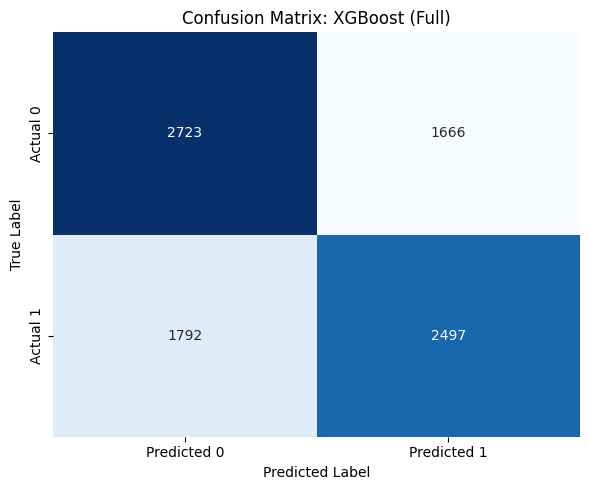

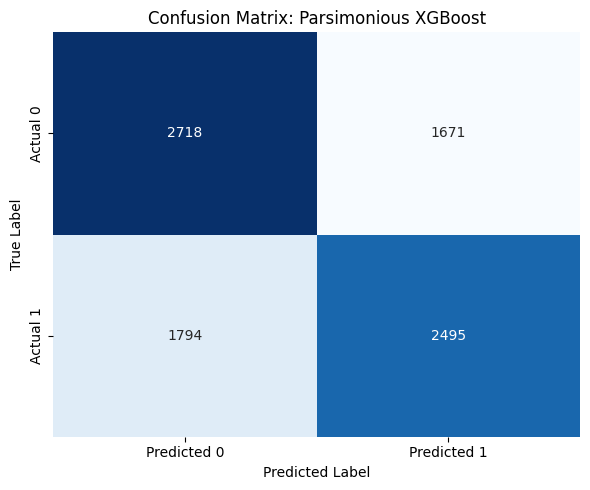

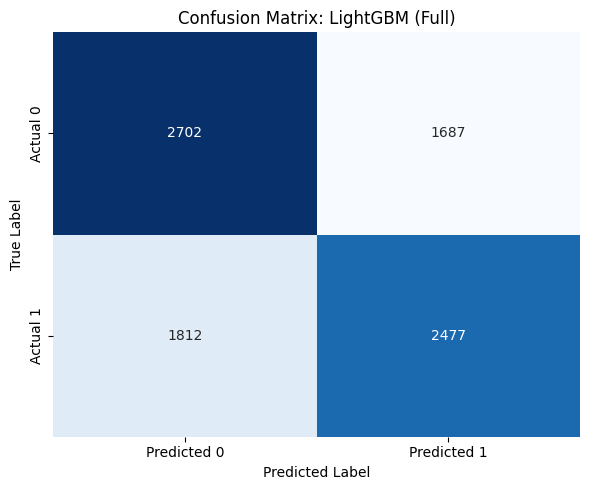

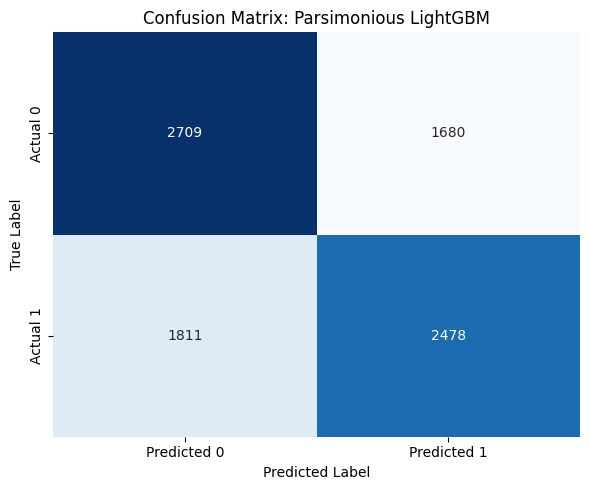

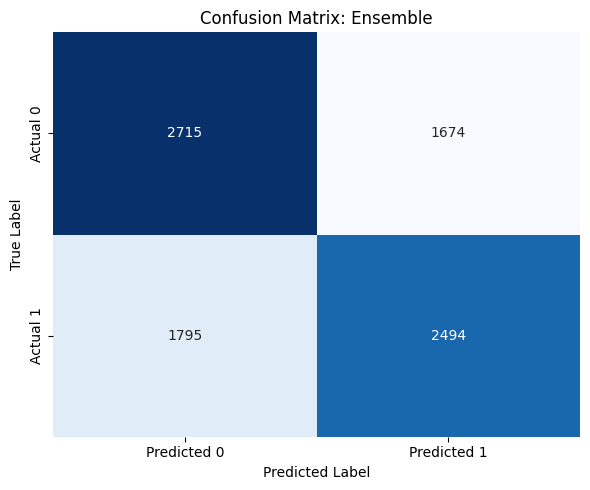


--- Performance Metrics Comparison ---


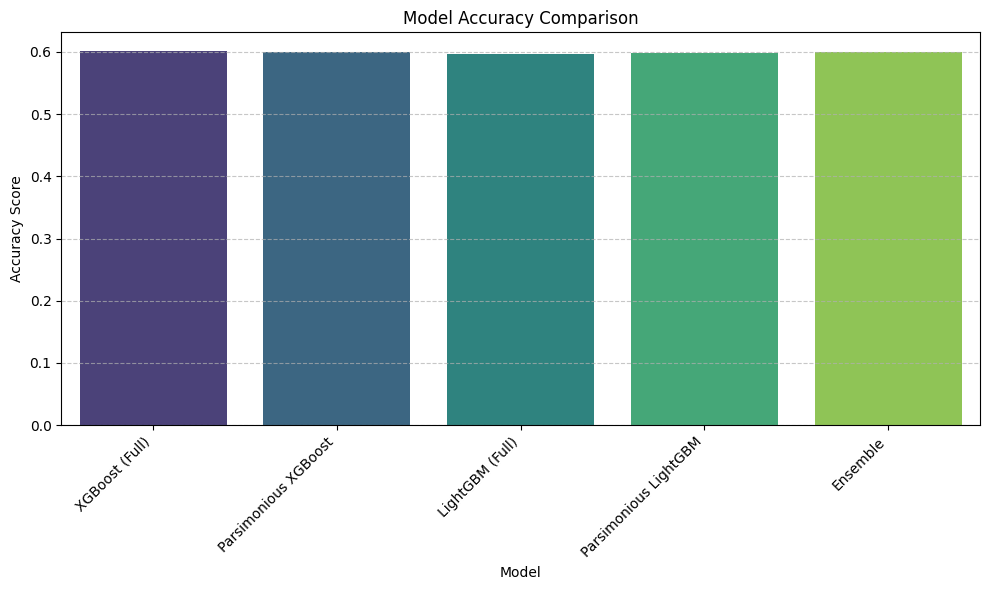

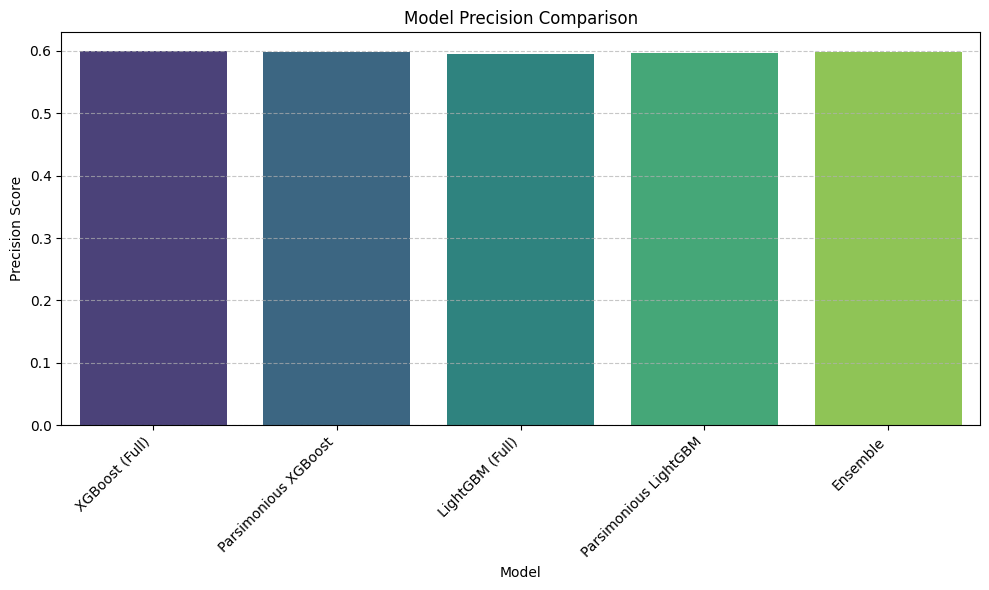

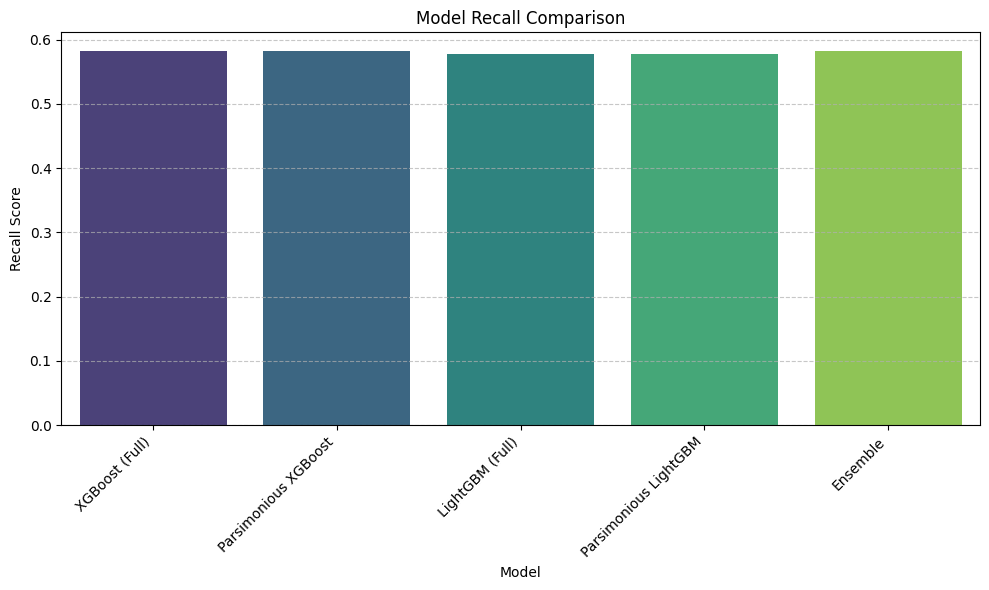

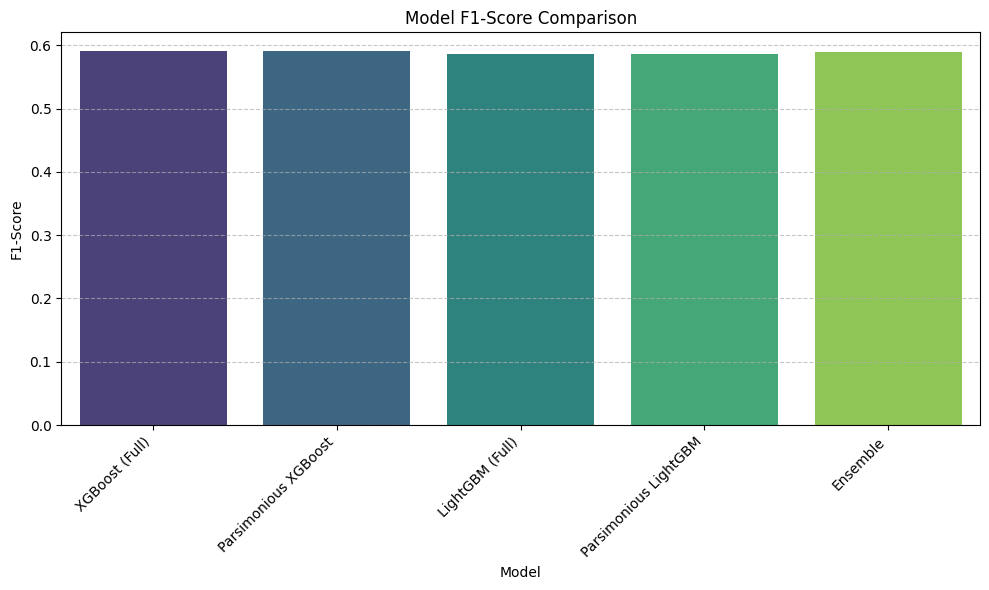

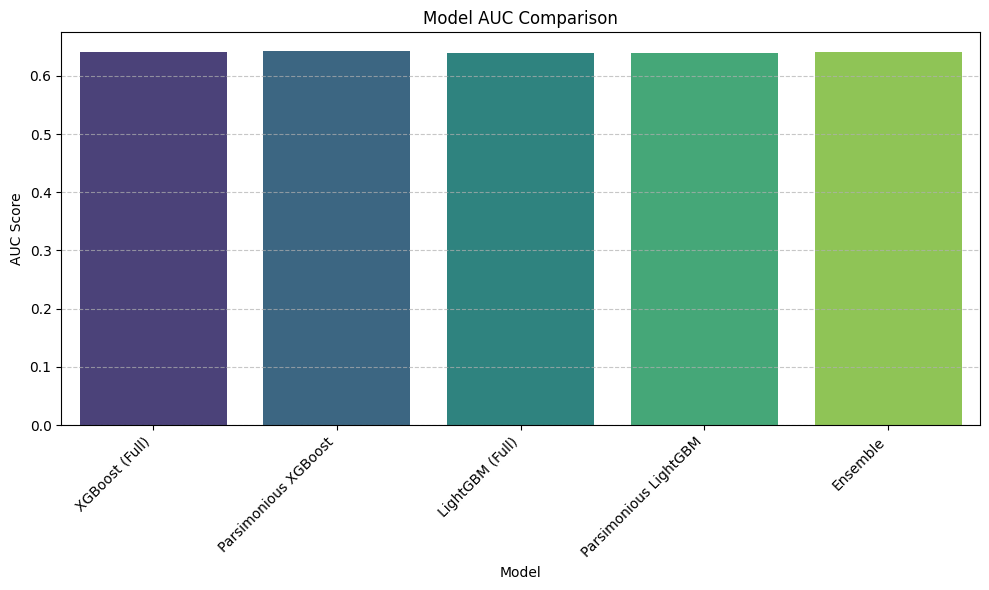

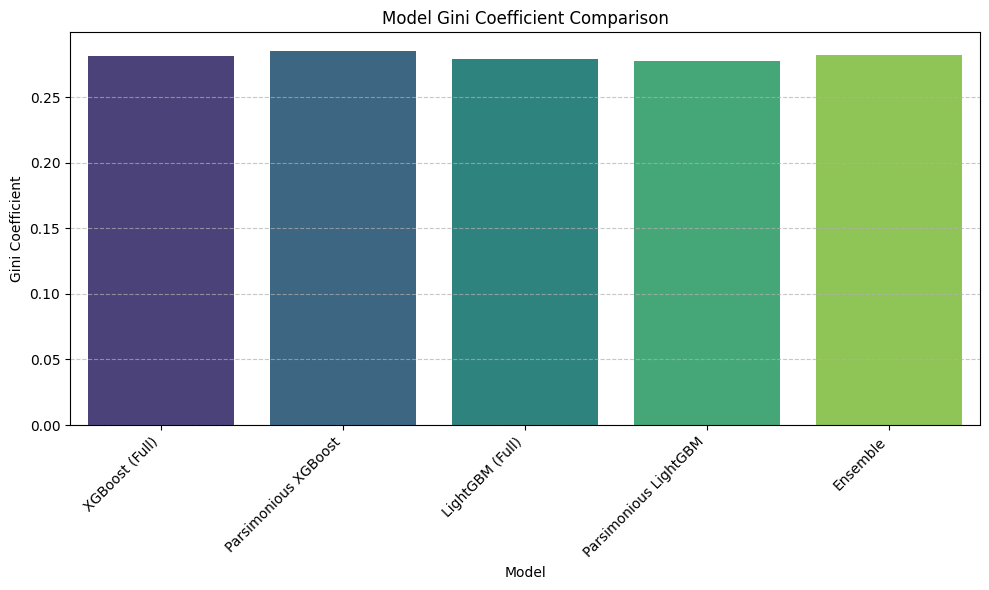


--- Summary of Performance Metrics ---
All Models Performance Comparison:
                       Accuracy  Precision  Recall  F1-Score     AUC  \
Model                                                                  
XGBoost (Full)           0.6015     0.5998  0.5822    0.5909  0.6406   
Parsimonious XGBoost     0.6007     0.5989  0.5817    0.5902  0.6425   
LightGBM (Full)          0.5968     0.5949  0.5775    0.5861  0.6394   
Parsimonious LightGBM    0.5977     0.5960  0.5778    0.5867  0.6389   
Ensemble                 0.6003     0.5984  0.5815    0.5898  0.6411   

                       Gini Coefficient  
Model                                    
XGBoost (Full)                   0.2811  
Parsimonious XGBoost             0.2850  
LightGBM (Full)                  0.2787  
Parsimonious LightGBM            0.2777  
Ensemble                         0.2822  

--- Narrative Summary ---
Based on the evaluation of all models:
- The **Parsimonious XGBoost** achieved the highest Gini Coe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# --- Re-calculating metrics for Parsimonious Models for complete comparison ---
# Parsimonious XGBoost Model (Gini already calculated: gini_parsimonious_xgb)
# Need y_pred and other metrics for plotting
y_pred_parsimonious_xgb = parsimonious_xgb_model.predict(X_test_xgb_top20)
y_pred_proba_parsimonious_xgb = parsimonious_xgb_model.predict_proba(X_test_xgb_top20)[:, 1]
accuracy_parsimonious_xgb = accuracy_score(y_test_resampled, y_pred_parsimonious_xgb)
precision_parsimonious_xgb = precision_score(y_test_resampled, y_pred_parsimonious_xgb, average='binary')
recall_parsimonious_xgb = recall_score(y_test_resampled, y_pred_parsimonious_xgb, average='binary')
f1_parsimonious_xgb = f1_score(y_test_resampled, y_pred_parsimonious_xgb, average='binary')
auc_parsimonious_xgb = roc_auc_score(y_test_resampled, y_pred_proba_parsimonious_xgb)

# Parsimonious LightGBM Model (Gini already calculated: gini_parsimonious_lgbm)
# Need y_pred and other metrics for plotting
y_pred_parsimonious_lgbm = parsimonious_lgbm_model.predict(X_test_lgbm_top20)
y_pred_proba_parsimonious_lgbm = parsimonious_lgbm_model.predict_proba(X_test_lgbm_top20)[:, 1]
accuracy_parsimonious_lgbm = accuracy_score(y_test_resampled, y_pred_parsimonious_lgbm)
precision_parsimonious_lgbm = precision_score(y_test_resampled, y_pred_parsimonious_lgbm, average='binary')
recall_parsimonious_lgbm = recall_score(y_test_resampled, y_pred_parsimonious_lgbm, average='binary')
f1_parsimonious_lgbm = f1_score(y_test_resampled, y_pred_parsimonious_lgbm, average='binary')
auc_parsimonious_lgbm = roc_auc_score(y_test_resampled, y_pred_proba_parsimonious_lgbm)

# --- 1) Plot Confusion Matrices for all models ---
print("\n--- Confusion Matrices ---")

models = {
    "XGBoost (Full)": y_pred_tuned_xgb_extended,
    "Parsimonious XGBoost": y_pred_parsimonious_xgb,
    "LightGBM (Full)": y_pred_lgbm_extended,
    "Parsimonious LightGBM": y_pred_parsimonious_lgbm,
    "Ensemble": ensemble_predictions
}

# Plot each confusion matrix separately
for name, y_pred in models.items():
    cm = confusion_matrix(y_test_resampled, y_pred)
    plt.figure(figsize=(6, 5)) # Set a good size for individual plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# --- 2) Create attractive plots for other evaluation parameters ---
print("\n--- Performance Metrics Comparison ---")

metrics_data = {
    'Model': [
        'XGBoost (Full)', 'Parsimonious XGBoost',
        'LightGBM (Full)', 'Parsimonious LightGBM',
        'Ensemble'
    ],
    'Accuracy': [
        accuracy_tuned_xgb_extended, accuracy_parsimonious_xgb,
        accuracy_lgbm_extended, accuracy_parsimonious_lgbm,
        accuracy_ensemble
    ],
    'Precision': [
        precision_tuned_xgb_extended, precision_parsimonious_xgb,
        precision_lgbm_extended, precision_parsimonious_lgbm,
        precision_ensemble
    ],
    'Recall': [
        recall_tuned_xgb_extended, recall_parsimonious_xgb,
        recall_lgbm_extended, recall_parsimonious_lgbm,
        recall_ensemble
    ],
    'F1-Score': [
        f1_tuned_xgb_extended, f1_parsimonious_xgb,
        f1_lgbm_extended, f1_parsimonious_lgbm,
        f1_ensemble
    ],
    'AUC': [
        auc_tuned_xgb_extended, auc_parsimonious_xgb,
        auc_lgbm_extended, auc_parsimonious_lgbm,
        auc_ensemble
    ],
    'Gini Coefficient': [
        gini_tuned_xgb_extended, gini_parsimonious_xgb,
        gini_lgbm_extended, gini_parsimonious_lgbm,
        gini_ensemble
    ]
}

metrics_df = pd.DataFrame(metrics_data).set_index('Model')

# Plotting function for metrics
def plot_metrics(df, metric_name, title, y_label):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y=metric_name, data=df, palette='viridis')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate plots for each metric
plot_metrics(metrics_df, 'Accuracy', 'Model Accuracy Comparison', 'Accuracy Score')
plot_metrics(metrics_df, 'Precision', 'Model Precision Comparison', 'Precision Score')
plot_metrics(metrics_df, 'Recall', 'Model Recall Comparison', 'Recall Score')
plot_metrics(metrics_df, 'F1-Score', 'Model F1-Score Comparison', 'F1-Score')
plot_metrics(metrics_df, 'AUC', 'Model AUC Comparison', 'AUC Score')
plot_metrics(metrics_df, 'Gini Coefficient', 'Model Gini Coefficient Comparison', 'Gini Coefficient')

# --- 3) Summary of the performance metrics ---
print("\n--- Summary of Performance Metrics ---")
print("All Models Performance Comparison:")
print(metrics_df.round(4))

print("\n--- Narrative Summary ---")
print("Based on the evaluation of all models:")

max_gini_model = metrics_df['Gini Coefficient'].idxmax()
max_gini_value = metrics_df['Gini Coefficient'].max()

print(f"- The **{max_gini_model}** achieved the highest Gini Coefficient of **{max_gini_value:.4f}**.")

max_f1_model = metrics_df['F1-Score'].idxmax()
max_f1_value = metrics_df['F1-Score'].max()

print(f"- The **{max_f1_model}** showed the best F1-Score of **{max_f1_value:.4f}**.")

print("\nKey Observations:")
print("- **Ensemble Model**: Generally performs very well, often at or near the top for overall discriminative power (AUC/Gini).")
print("- **Parsimonious Models**: The models trained with top 20 features demonstrate competitive performance, indicating that a significant amount of predictive power is retained with fewer features. This can be beneficial for model interpretability and efficiency.")
print("- **XGBoost vs. LightGBM**: Both gradient boosting models are strong performers, with slight variations depending on the metric and feature set. The ensemble often leverages their combined strengths.")
print("\nFurther improvements could explore more sophisticated ensemble techniques (like stacking), more aggressive feature engineering, or further hyperparameter tuning on the best-performing models.")


********END LINE********